TABEL ANOVA DUA ARAH DENGAN BLOCKING
-----------------------------------


,Sum of Squares,Degrees of Freedom,Mean Square,F-value,P-value,F-Critical
C(Baterai),0.243841,2.0,0.121921,1.721259,1.843138e-01,3.091191
C(Jarak_dari_Router),14.931478,2.0,7.465739,105.400207,6.024680e-25,3.091191
C(Blocking_Device),3.982882,3.0,1.327627,18.743250,1.192889e-09,2.699393
C(Baterai):C(Jarak_dari_Router),0.422407,4.0,0.105602,1.490869,2.110081e-01,2.466476
Residual,6.799901,96.0,0.070832,NaN,NaN,1.401332
Total,26.380510,107.0,NaN,NaN,NaN,NaN



RINGKASAN MODEL
--------------
                                OLS Regression Results                               
Dep. Variable:     Kecepatan_Download_Melted   R-squared:                       0.742
Model:                                   OLS   Adj. R-squared:                  0.713
Method:                        Least Squares   F-statistic:                     25.13
Date:                       Sat, 12 Apr 2025   Prob (F-statistic):           1.33e-23
Time:                               21:32:01   Log-Likelihood:                -3.9233
No. Observations:                        108   AIC:                             31.85
Df Residuals:                             96   BIC:                             64.03
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0

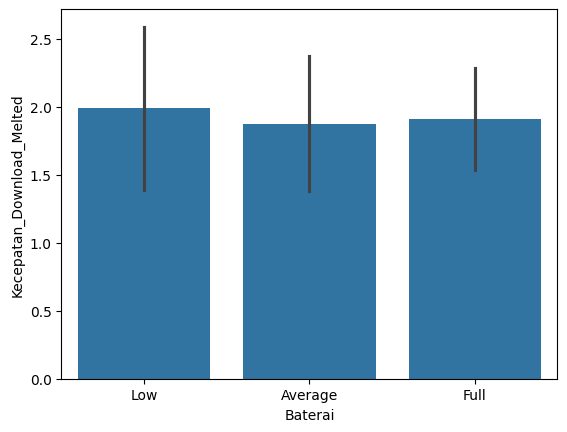

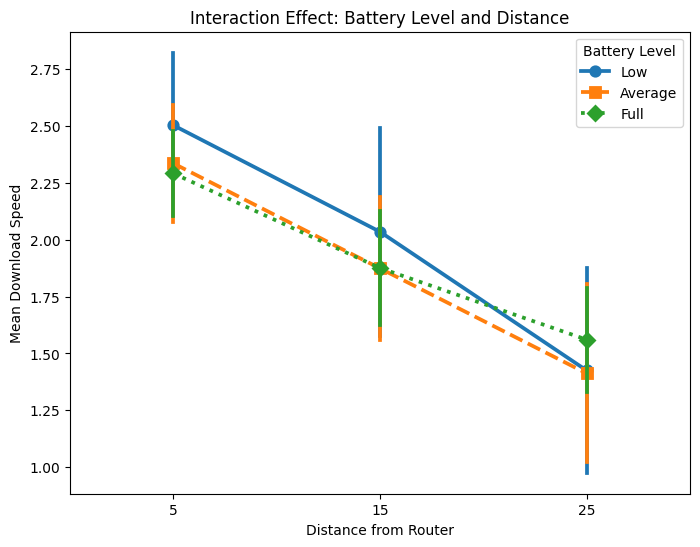

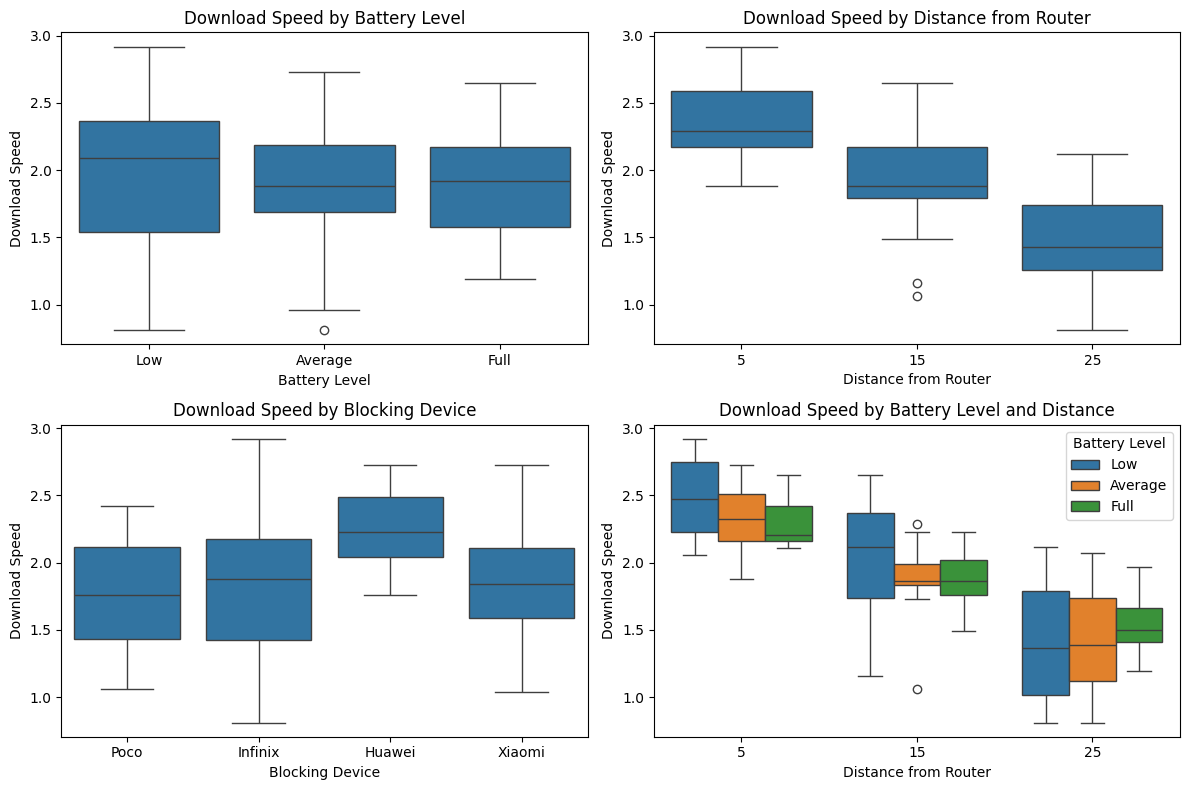

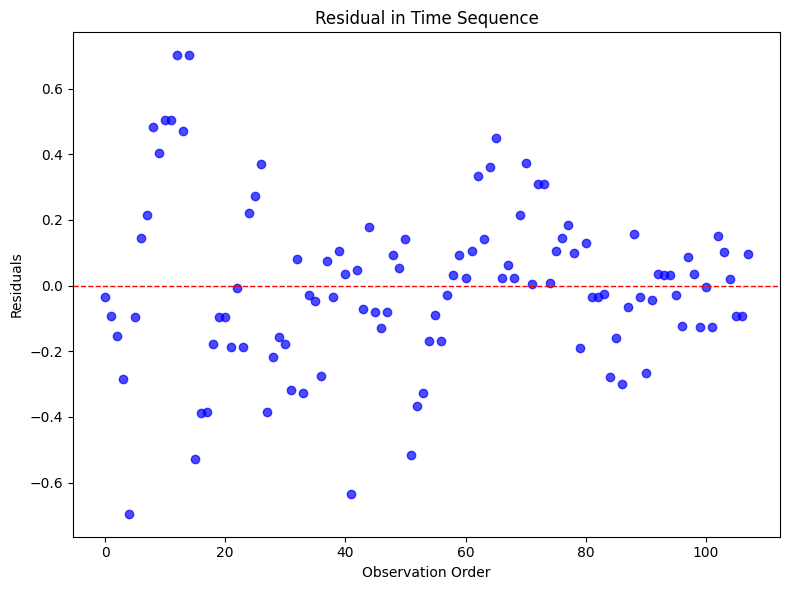

<Figure size 800x600 with 0 Axes>

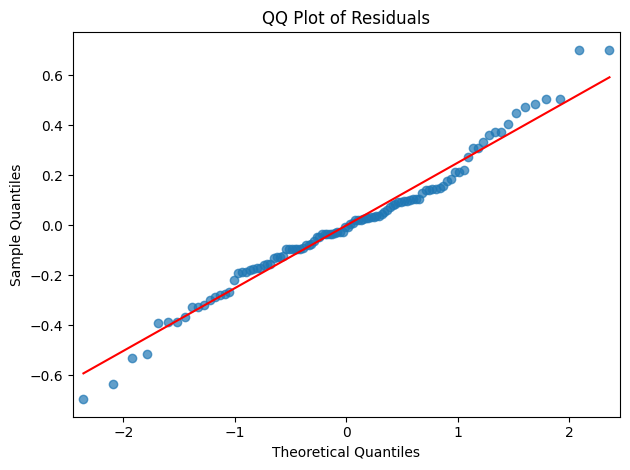

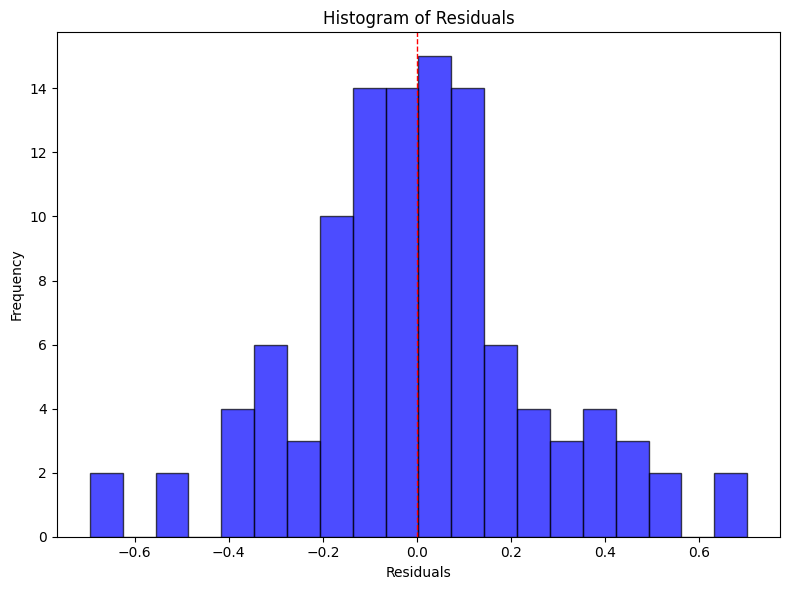

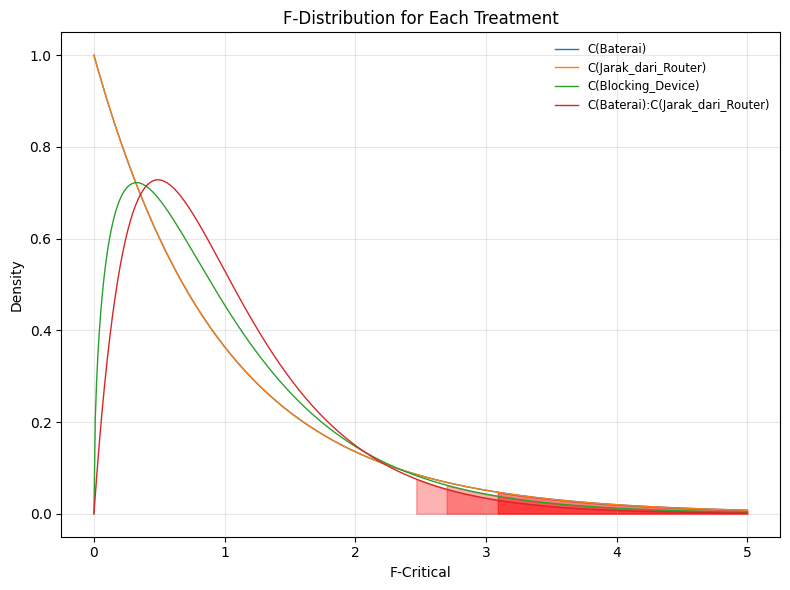

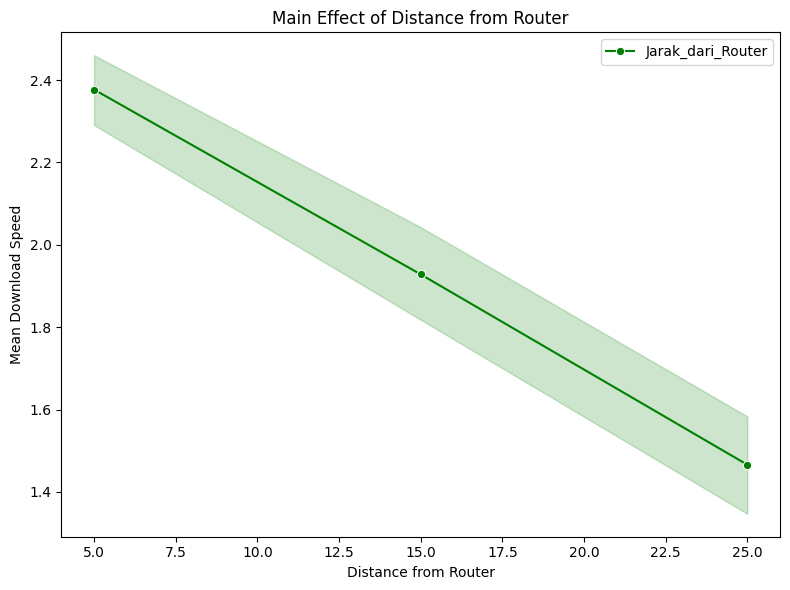

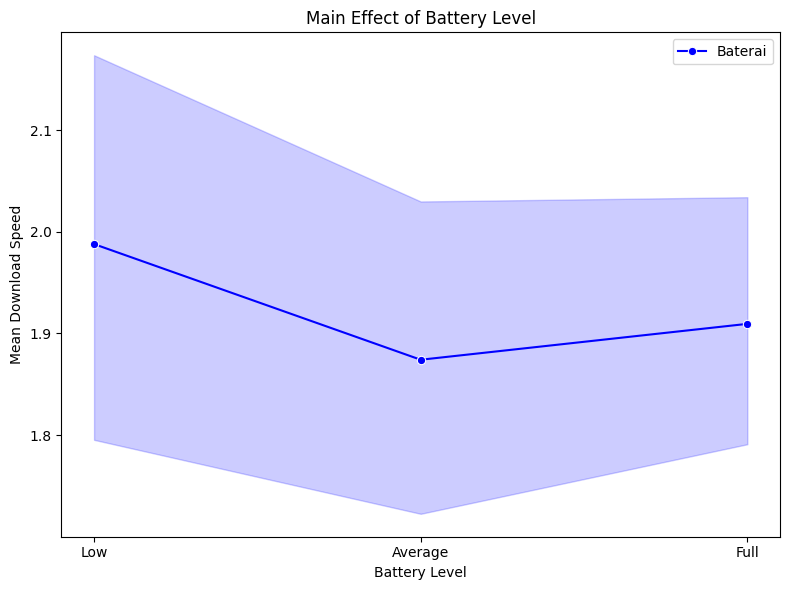

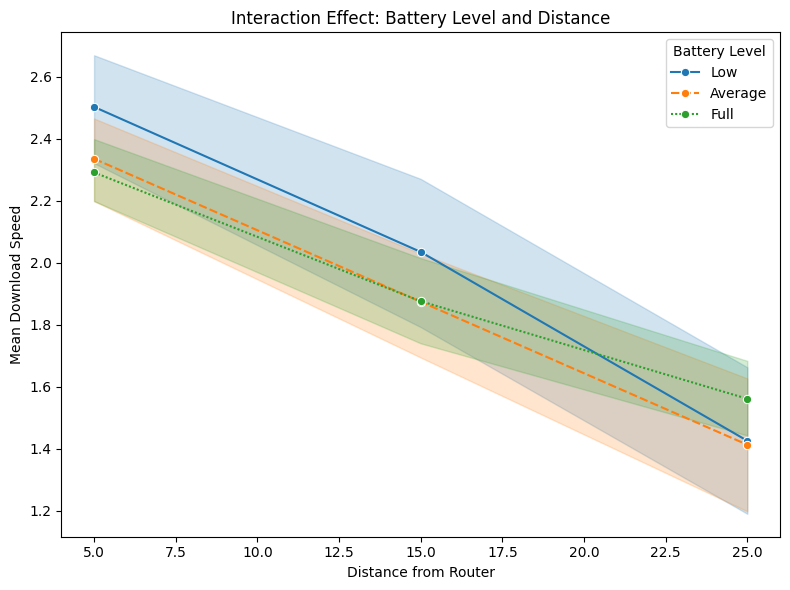

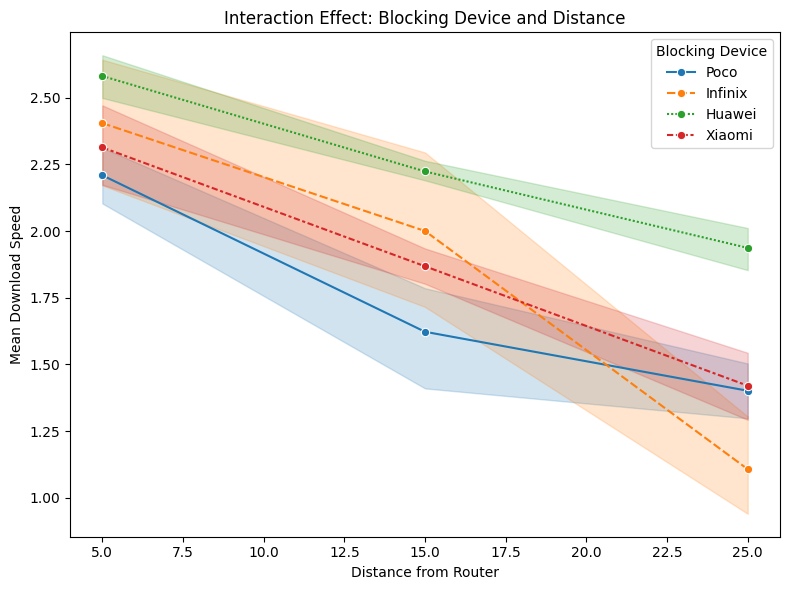

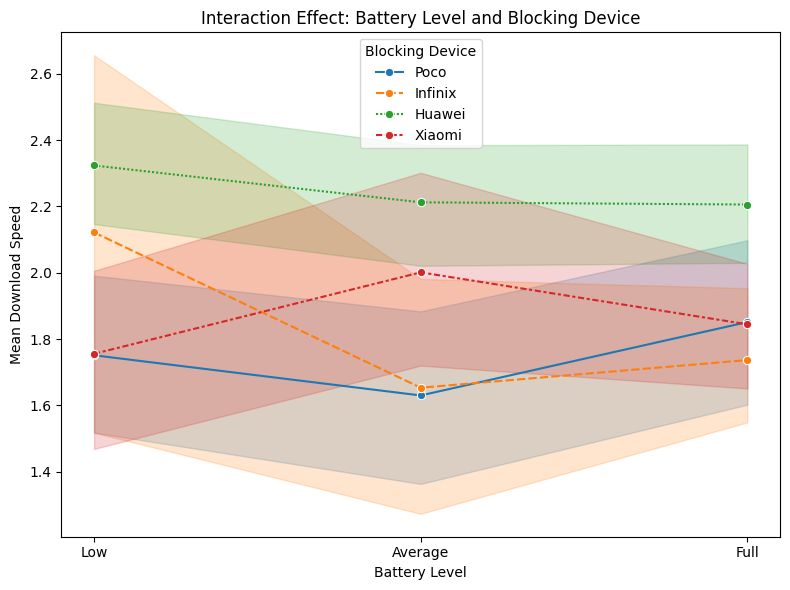

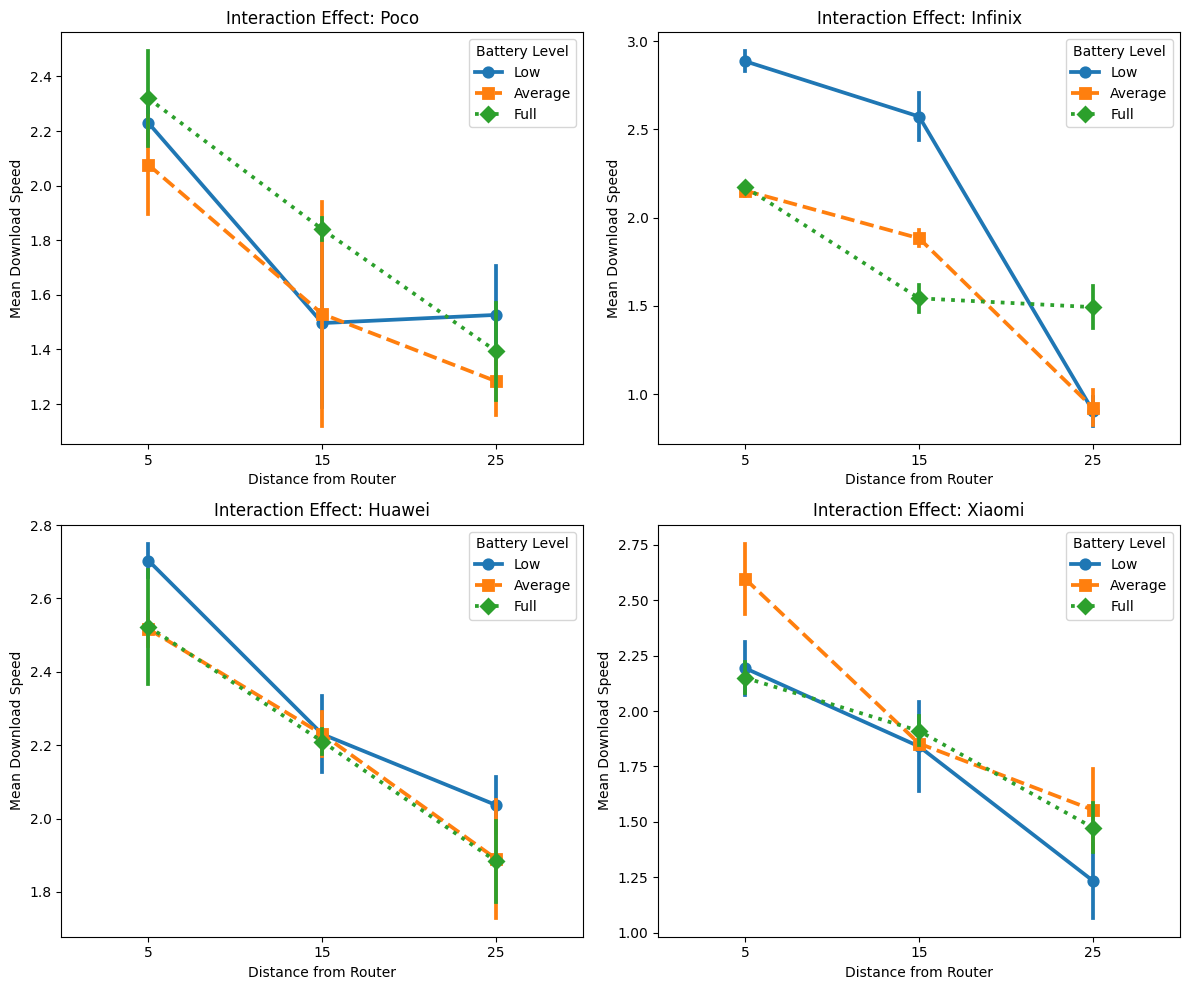

TABEL DESKRIPTIF STATISTIK
--------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,median,mode,range
No,108.0,NaN,NaN,NaN,18.5,10.436725,1.0,9.75,18.5,27.25,36.0,18.50,1,35.00
Baterai,108,3,Low,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Average,NaN
Blocking_Device,108,4,Poco,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Huawei,NaN
Jarak_dari_Router,108.0,NaN,NaN,NaN,15.0,8.203031,5.0,5.0,15.0,25.0,25.0,15.00,5.0,20.00
Kecepatan_Download,108.0,NaN,NaN,NaN,1.923824,0.496535,0.81,1.57,1.95,2.23,2.92,1.95,2.17,2.11
Replikasi,108.0,NaN,NaN,NaN,2.0,0.820303,1.0,1.0,2.0,3.0,3.0,2.00,1.0,2.00


In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from scipy.stats import f
import seaborn as sns

# Data eksperimen dalam bentuk dictionary
data = {
    'No': [],
    'Baterai': [],
    'Blocking_Device': [],
    'Jarak_dari_Router': [],
    'Kecepatan_Download': [],
    'Replikasi': []
}

# Mengisi data dari tabel
rows = [
    # Low (10-34%)
    {'Baterai': 'Low', 'Blocking_Device': 'Poco', 'Jarak_dari_Router': 5, 'Kecepatan': [2.29, 2.23, 2.17]},
    {'Baterai': 'Low', 'Blocking_Device': 'Poco', 'Jarak_dari_Router': 15, 'Kecepatan': [1.57, 1.16, 1.76]},
    {'Baterai': 'Low', 'Blocking_Device': 'Poco', 'Jarak_dari_Router': 25, 'Kecepatan': [1.39, 1.46, 1.73]},
    {'Baterai': 'Low', 'Blocking_Device': 'Infinix', 'Jarak_dari_Router': 5, 'Kecepatan': [2.82, 2.92, 2.92]},
    {'Baterai': 'Low', 'Blocking_Device': 'Infinix', 'Jarak_dari_Router': 15, 'Kecepatan': [2.65, 2.42, 2.65]},
    {'Baterai': 'Low', 'Blocking_Device': 'Infinix', 'Jarak_dari_Router': 25, 'Kecepatan': [0.81, 0.95, 0.953]},
    {'Baterai': 'Low', 'Blocking_Device': 'Huawei', 'Jarak_dari_Router': 5, 'Kecepatan': [2.65, 2.73, 2.73]},
    {'Baterai': 'Low', 'Blocking_Device': 'Huawei', 'Jarak_dari_Router': 15, 'Kecepatan': [2.17, 2.35, 2.17]},
    {'Baterai': 'Low', 'Blocking_Device': 'Huawei', 'Jarak_dari_Router': 25, 'Kecepatan': [1.97, 2.02, 2.12]},
    {'Baterai': 'Low', 'Blocking_Device': 'Xiaomi', 'Jarak_dari_Router': 5, 'Kecepatan': [2.06, 2.23, 2.29]},
    {'Baterai': 'Low', 'Blocking_Device': 'Xiaomi', 'Jarak_dari_Router': 15, 'Kecepatan': [1.8, 1.66, 2.06]},
    {'Baterai': 'Low', 'Blocking_Device': 'Xiaomi', 'Jarak_dari_Router': 25, 'Kecepatan': [1.04, 1.34, 1.32]},
    
    # Average (35-70%)
    {'Baterai': 'Average', 'Blocking_Device': 'Poco', 'Jarak_dari_Router': 5, 'Kecepatan': [1.88, 2.23, 2.12]},
    {'Baterai': 'Average', 'Blocking_Device': 'Poco', 'Jarak_dari_Router': 15, 'Kecepatan': [1.8, 1.73, 1.06]},
    {'Baterai': 'Average', 'Blocking_Device': 'Poco', 'Jarak_dari_Router': 25, 'Kecepatan': [1.28, 1.16, 1.41]},
    {'Baterai': 'Average', 'Blocking_Device': 'Infinix', 'Jarak_dari_Router': 5, 'Kecepatan': [2.17, 2.12, 2.17]},
    {'Baterai': 'Average', 'Blocking_Device': 'Infinix', 'Jarak_dari_Router': 15, 'Kecepatan': [1.88, 1.84, 1.93]},
    {'Baterai': 'Average', 'Blocking_Device': 'Infinix', 'Jarak_dari_Router': 25, 'Kecepatan': [0.81, 0.96, 1.0]},
    {'Baterai': 'Average', 'Blocking_Device': 'Huawei', 'Jarak_dari_Router': 5, 'Kecepatan': [2.49, 2.57, 2.49]},
    {'Baterai': 'Average', 'Blocking_Device': 'Huawei', 'Jarak_dari_Router': 15, 'Kecepatan': [2.17, 2.23, 2.29]},
    {'Baterai': 'Average', 'Blocking_Device': 'Huawei', 'Jarak_dari_Router': 25, 'Kecepatan': [1.76, 1.84, 2.07]},
    {'Baterai': 'Average', 'Blocking_Device': 'Xiaomi', 'Jarak_dari_Router': 5, 'Kecepatan': [2.42, 2.64, 2.73]},
    {'Baterai': 'Average', 'Blocking_Device': 'Xiaomi', 'Jarak_dari_Router': 15, 'Kecepatan': [1.84, 1.88, 1.84]},
    {'Baterai': 'Average', 'Blocking_Device': 'Xiaomi', 'Jarak_dari_Router': 25, 'Kecepatan': [1.57, 1.73, 1.36]},
    
    # Full (71-100%)
    {'Baterai': 'Full', 'Blocking_Device': 'Poco', 'Jarak_dari_Router': 5, 'Kecepatan': [2.42, 2.42, 2.12]},
    {'Baterai': 'Full', 'Blocking_Device': 'Poco', 'Jarak_dari_Router': 15, 'Kecepatan': [1.8, 1.84, 1.88]},
    {'Baterai': 'Full', 'Blocking_Device': 'Poco', 'Jarak_dari_Router': 25, 'Kecepatan': [1.48, 1.19, 1.51]},
    {'Baterai': 'Full', 'Blocking_Device': 'Infinix', 'Jarak_dari_Router': 5, 'Kecepatan': [2.17, 2.17, 2.18]},
    {'Baterai': 'Full', 'Blocking_Device': 'Infinix', 'Jarak_dari_Router': 15, 'Kecepatan': [1.51, 1.63, 1.49]},
    {'Baterai': 'Full', 'Blocking_Device': 'Infinix', 'Jarak_dari_Router': 25, 'Kecepatan': [1.41, 1.63, 1.44]},
    {'Baterai': 'Full', 'Blocking_Device': 'Huawei', 'Jarak_dari_Router': 5, 'Kecepatan': [2.35, 2.57, 2.65]},
    {'Baterai': 'Full', 'Blocking_Device': 'Huawei', 'Jarak_dari_Router': 15, 'Kecepatan': [2.23, 2.23, 2.17]},
    {'Baterai': 'Full', 'Blocking_Device': 'Huawei', 'Jarak_dari_Router': 25, 'Kecepatan': [1.76, 1.97, 1.92]},
    {'Baterai': 'Full', 'Blocking_Device': 'Xiaomi', 'Jarak_dari_Router': 5, 'Kecepatan': [2.11, 2.23, 2.11]},
    {'Baterai': 'Full', 'Blocking_Device': 'Xiaomi', 'Jarak_dari_Router': 15, 'Kecepatan': [1.97, 1.92, 1.84]},
    {'Baterai': 'Full', 'Blocking_Device': 'Xiaomi', 'Jarak_dari_Router': 25, 'Kecepatan': [1.41, 1.41, 1.6]},
]

# Membangun DataFrame
for i, row in enumerate(rows):
    for rep, speed in enumerate(row['Kecepatan'], 1):
        data['No'].append(i+1)
        data['Baterai'].append(row['Baterai'])
        data['Blocking_Device'].append(row['Blocking_Device'])
        data['Jarak_dari_Router'].append(row['Jarak_dari_Router'])
        data['Kecepatan_Download'].append(speed)
        data['Replikasi'].append(rep)


# Membuat DataFrame
df = pd.DataFrame(data)

# Melting the DataFrame for visualization
df_melted = pd.melt(
    df,
    id_vars=['No', 'Baterai', 'Blocking_Device', 'Jarak_dari_Router'],
    value_vars=['Kecepatan_Download'],
    var_name='Pengulangan',
    value_name='Kecepatan_Download_Melted'  # Changed to avoid conflict
)

model = ols('Kecepatan_Download_Melted ~ C(Baterai) + C(Jarak_dari_Router) + C(Baterai):C(Jarak_dari_Router) + C(Blocking_Device)', data=df_melted).fit()

# Tabel ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Menambahkan kolom Mean Square (MS)
anova_table['mean_sq'] = anova_table['sum_sq'] / anova_table['df']

# Menambahkan kolom F-Critical
alpha = 0.05  # Tingkat signifikansi

# Pastikan df untuk setiap faktor dihitung dengan benar
anova_table['f_critical'] = anova_table.apply(
    lambda row: f.ppf(1 - alpha, row['df'], anova_table.loc['Residual', 'df']) if not pd.isna(row['df']) else np.nan,
    axis=1
)

# Mengganti nama kolom
anova_table_renamed = anova_table.rename(columns={
    'sum_sq': 'Sum of Squares',
    'df': 'Degrees of Freedom',
    'F': 'F-value',
    'PR(>F)': 'P-value',
    'mean_sq': 'Mean Square',
    'f_critical': 'F-Critical'
})

# Menambahkan baris total
total_row = pd.DataFrame(anova_table_renamed[['Sum of Squares', 'Degrees of Freedom']].sum()).T
total_row['Mean Square'] = np.nan
total_row['F-value'] = np.nan
total_row['P-value'] = np.nan
total_row['F-Critical'] = np.nan
total_row.index = ['Total']

anova_table_reordered = pd.concat([anova_table_renamed, total_row])

new_column_order = ['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F-value', 'P-value', 'F-Critical']
anova_table_reordered = anova_table_reordered[new_column_order]

# Menampilkan tabel ANOVA dengan kolom tambahan
print("TABEL ANOVA DUA ARAH DENGAN BLOCKING")
print("-----------------------------------")
display(anova_table_reordered)

# Ringkasan model
print("\nRINGKASAN MODEL")
print("--------------")
print(model.summary())

# Menentukan perlakuan yang menolak H0 berdasarkan nilai F dan F-Critical
reject_h0 = anova_table[anova_table['F'] > anova_table['f_critical']].index.tolist()

# Menampilkan perlakuan yang menolak H0
sns.barplot(x='Baterai', y='Kecepatan_Download_Melted', data=df_melted, errorbar='sd')

import matplotlib.pyplot as plt

# Grafik Interaction Effect
plt.figure(figsize=(8, 6))
sns.pointplot(
    x='Jarak_dari_Router', 
    y='Kecepatan_Download_Melted', 
    hue='Baterai', 
    data=df_melted, 
    errorbar='sd', 
    markers=['o', 's', 'D'], 
    linestyles=['-', '--', ':']
)
plt.title('Interaction Effect: Battery Level and Distance')
plt.ylabel('Mean Download Speed')
plt.xlabel('Distance from Router')
plt.legend(title='Battery Level')
plt.show()

# Visualisasi data menggunakan boxplot untuk melihat distribusi kecepatan download berdasarkan faktor
plt.figure(figsize=(12, 8))

# Boxplot untuk Kecepatan Download berdasarkan Baterai
plt.subplot(2, 2, 1)
sns.boxplot(x='Baterai', y='Kecepatan_Download_Melted', data=df_melted)
plt.title('Download Speed by Battery Level')
plt.xlabel('Battery Level')
plt.ylabel('Download Speed')

# Boxplot untuk Kecepatan Download berdasarkan Jarak dari Router
plt.subplot(2, 2, 2)
sns.boxplot(x='Jarak_dari_Router', y='Kecepatan_Download_Melted', data=df_melted)
plt.title('Download Speed by Distance from Router')
plt.xlabel('Distance from Router')
plt.ylabel('Download Speed')

# Boxplot untuk Kecepatan Download berdasarkan Blocking Device
plt.subplot(2, 2, 3)
sns.boxplot(x='Blocking_Device', y='Kecepatan_Download_Melted', data=df_melted)
plt.title('Download Speed by Blocking Device')
plt.xlabel('Blocking Device')
plt.ylabel('Download Speed')

# Boxplot untuk Kecepatan Download berdasarkan Interaksi Baterai dan Jarak
plt.subplot(2, 2, 4)
sns.boxplot(x='Jarak_dari_Router', y='Kecepatan_Download_Melted', hue='Baterai', data=df_melted)
plt.title('Download Speed by Battery Level and Distance')
plt.xlabel('Distance from Router')
plt.ylabel('Download Speed')
plt.legend(title='Battery Level')

plt.tight_layout()
plt.show()

# Grafik Residual in Time Sequence
plt.figure(figsize=(8, 6))
plt.scatter(range(len(model.resid)), model.resid, color='blue', alpha=0.7)  # Added alpha for better visibility
plt.title('Residual in Time Sequence')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Changed line color to red
plt.tight_layout()
plt.show()

# QQ Plot of Residuals
plt.figure(figsize=(8, 6))
sm.qqplot(model.resid, line='s', alpha=0.7)  # Added alpha for better visibility
plt.title('QQ Plot of Residuals')
plt.tight_layout()
plt.show()

# Grafik Histogram Residual
plt.figure(figsize=(8, 6))
plt.hist(model.resid, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)  # Vertical line at zero
plt.tight_layout()
plt.show()

# Plotting F-distribution for each treatment
plt.figure(figsize=(8, 6))  # Reduced figure size

# Iterate over each treatment in the ANOVA table
for idx, row in anova_table.iterrows():
    if not pd.isna(row['F']):  # Skip rows without F-value
        df1 = int(row['df'])  # Degrees of freedom for the treatment
        df2 = int(anova_table.loc['Residual', 'df'])  # Residual degrees of freedom
        x = np.linspace(0, 5, 500)  # Range for F-distribution
        y = f.pdf(x, df1, df2)  # F-distribution PDF
        
        # Plot the F-distribution
        plt.plot(x, y, label=f'{idx}', linewidth=1)  # Full label and reduced line width
        
        # Highlight the critical region
        critical_x = np.linspace(row['f_critical'], 5, 500)
        critical_y = f.pdf(critical_x, df1, df2)
        plt.fill_between(critical_x, critical_y, color='red', alpha=0.3)

# Add labels and legend
plt.title('F-Distribution for Each Treatment')
plt.xlabel('F-Critical')
plt.ylabel('Density')
plt.legend(fontsize='small', loc='upper right', frameon=False)  # Removed legend frame for better aesthetics
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Grafik Main Effect untuk Jarak dari Router
plt.figure(figsize=(8, 6))
sns.lineplot(x='Jarak_dari_Router', y='Kecepatan_Download', data=df, marker='o', label='Jarak_dari_Router', color='green')
plt.title('Main Effect of Distance from Router')
plt.ylabel('Mean Download Speed')
plt.xlabel('Distance from Router')
plt.tight_layout()
plt.show()

# Grafik Main Effect untuk Baterai
plt.figure(figsize=(8, 6))
sns.lineplot(x='Baterai', y='Kecepatan_Download', data=df, marker='o', label='Baterai', color='blue')
plt.title('Main Effect of Battery Level')
plt.ylabel('Mean Download Speed')
plt.xlabel('Battery Level')
plt.tight_layout()
plt.show()

# Grafik Interaction Effect untuk Baterai dan Jarak dari Router
plt.figure(figsize=(8, 6))
sns.lineplot(x='Jarak_dari_Router', y='Kecepatan_Download', hue='Baterai', data=df, marker='o', style='Baterai')
plt.title('Interaction Effect: Battery Level and Distance')
plt.ylabel('Mean Download Speed')   
plt.xlabel('Distance from Router')
plt.legend(title='Battery Level')
plt.tight_layout()
plt.show()

# Grafik Interaction Effect untuk Blocking Device dan Jarak dari Router
plt.figure(figsize=(8, 6))
sns.lineplot(x='Jarak_dari_Router', y='Kecepatan_Download', hue='Blocking_Device', data=df, marker='o', style='Blocking_Device')
plt.title('Interaction Effect: Blocking Device and Distance')
plt.ylabel('Mean Download Speed')
plt.xlabel('Distance from Router')
plt.legend(title='Blocking Device')
plt.tight_layout()
plt.show()

# Grafik Interaction Effect untuk Baterai dan Blocking Device
plt.figure(figsize=(8, 6))
sns.lineplot(x='Baterai', y='Kecepatan_Download', hue='Blocking_Device', data=df, marker='o', style='Blocking_Device')
plt.title('Interaction Effect: Battery Level and Blocking Device')
plt.ylabel('Mean Download Speed')
plt.xlabel('Battery Level')
plt.legend(title='Blocking Device')
plt.tight_layout()
plt.show()

# Grafik Interaction Effect untuk Baterai, Blocking Device, dan Jarak dari Router
plt.figure(figsize=(12, 10))

# Plot 1: Interaction Effect for Blocking Device 'Poco'
plt.subplot(2, 2, 1)
sns.pointplot(
    x='Jarak_dari_Router', 
    y='Kecepatan_Download', 
    hue='Baterai', 
    data=df[df['Blocking_Device'] == 'Poco'], 
    errorbar='sd',
    markers=['o', 's', 'D'], 
    linestyles=['-', '--', ':']
)
plt.title('Interaction Effect: Poco')
plt.ylabel('Mean Download Speed')
plt.xlabel('Distance from Router')
plt.legend(title='Battery Level')

# Plot 2: Interaction Effect for Blocking Device 'Infinix'
plt.subplot(2, 2, 2)
sns.pointplot(
    x='Jarak_dari_Router', 
    y='Kecepatan_Download', 
    hue='Baterai', 
    data=df[df['Blocking_Device'] == 'Infinix'], 
    errorbar='sd',
    markers=['o', 's', 'D'], 
    linestyles=['-', '--', ':']
)
plt.title('Interaction Effect: Infinix')
plt.ylabel('Mean Download Speed')
plt.xlabel('Distance from Router')
plt.legend(title='Battery Level')

# Plot 3: Interaction Effect for Blocking Device 'Huawei'
plt.subplot(2, 2, 3)
sns.pointplot(
    x='Jarak_dari_Router', 
    y='Kecepatan_Download', 
    hue='Baterai', 
    data=df[df['Blocking_Device'] == 'Huawei'], 
    errorbar='sd',
    markers=['o', 's', 'D'], 
    linestyles=['-', '--', ':']
)
plt.title('Interaction Effect: Huawei')
plt.ylabel('Mean Download Speed')
plt.xlabel('Distance from Router')
plt.legend(title='Battery Level')

# Plot 4: Interaction Effect for Blocking Device 'Xiaomi'
plt.subplot(2, 2, 4)
sns.pointplot(
    x='Jarak_dari_Router', 
    y='Kecepatan_Download', 
    hue='Baterai', 
    data=df[df['Blocking_Device'] == 'Xiaomi'], 
    errorbar='sd',
    markers=['o', 's', 'D'], 
    linestyles=['-', '--', ':']
)
plt.title('Interaction Effect: Xiaomi')
plt.ylabel('Mean Download Speed')
plt.xlabel('Distance from Router')
plt.legend(title='Battery Level')

plt.tight_layout()
plt.show()

# Membuat tabel deskriptif statistik
descriptive_stats = df.describe(include='all').transpose()

# Menambahkan kolom tambahan untuk statistik yang lebih spesifik
descriptive_stats['median'] = df.median(numeric_only=True)
descriptive_stats['mode'] = df.mode().iloc[0]
descriptive_stats['range'] = df.max(numeric_only=True) - df.min(numeric_only=True)

# Menampilkan tabel deskriptif statistik
print("TABEL DESKRIPTIF STATISTIK")
print("--------------------------")
display(descriptive_stats)


